### <div align="center"><span style="font-family:Verdana;"> Quantum Physics
### <div align="center"><span style="font-family:Verdana;"> Practical work 1  
</span >   

# <div align="center"><span style="font-family:Times New Roman;text-decoration:underline;" > Numerical integration of the Schrödinger equation
### <div align="center"><span style="font-family:Verdana;"> Oveis Mahmoudi (CompuPhys), Hadi Nasser eldini (CompuPhys), Sanjay Sharma (Pics) - January, 2022
</span> 

## INTRODUCTION

The main purpose of this numerical exercise is to study a dynamical quantum system. To do this, we use the Richardson and the split operator methods. We make some comparisons between these two integrators based on the results to find their limitations, as well as their stability. We also explore the STIRAP process that involves the adiabatic evolution of states.

## METHODS

### The quantum system

Stimulated Raman adiabatic passage (STIRAP) is a process that alows the exchange of a population between two applicable quantum states. This process involves the excitation in a three level atom with three states $\left| 1 \right>, \left| 2 \right>, \left| 3 \right>$ that are induced by two pulsed laser fields. We call the first one "Pump" which is quasi-resonant with the transition $\left| 1 \right> \rightarrow \left| 2 \right>$ and the second one is called "Stokes" which is quasi-resonant with the transition $\left| 2\right>\rightarrow\left| 3 \right>$. The internal dynamics of the atom is described by the time-dependent Schrödinger equation, where H(t) is the Hamiltonian matrix for the system and its interaction with the pulsed fields. The Hamiltonian of this system is:

$$
H(\Omega_P,\Omega_S) = \frac{\hbar}{2}\begin{pmatrix}
0 & \Omega_P & 0\\
\Omega_P & 2\Delta_P & \Omega_S\\
0 & \Omega_S & 2(\Delta_P-\Delta_S)
\end{pmatrix}
$$

$\Omega_P$ and $\Omega_S$ are the Rabi frequencies related to the coupling. $\Delta_P$ and $\Delta_S$ are the detunings defined as $\Delta_P = E_2-E_1-\hbar\omega_P$ and $\Delta_S = E_3-E_2-\hbar\omega_S$. These are constants set to $\Delta_P$ = 0.5 a.u. and $\Delta_S$ = -0.5 a.u.. The Rabi frequencies can be calculated as follows:

$$
\Omega_{P/S}(t) = \Omega_0e^{-(t-t_{P/S})^2/\mathcal{T}_{S/P}^2}
$$

Here, the peak value $\Omega_0$ is set as 3.5 a.u. and the duration of the pulses $\mathcal{T}_{S/P}$ = 15 a.u.. We send in a pulse at time 10 a.u. and another pulse at time 35 a.u., we have the coice of sending in either the Pump pulse or the Stokes pulse first.
 

### Richardson integrator


We suppose that there exists a list of vectors denoted $\psi$ such that $\psi(0)$ is the initial condition which is set as $\left| 1 \right>$ and a function H which returns the value of the Hamiltonian matrix with respect to the time. We integrate for a time vector that has been already defined in the previous section with initial time (tmin=) -30, final time (tmax=) -80 and the total number of intervals (ntime=) 400.
   
   For integrating the Schrödinger equation we look at the Richardson and the split operator method.
  
   - **The Richardson Method**
   
     The Richardson methd is a second order differentiating method based on second order finite difference method in this process we set $\psi_n = \psi(t_n)$. To find the states of the system we use the second order differncing method based on the second order finite differences obtained using the Taylor expansions. 
     
     $$
     \psi(t+\Delta t) = \psi(t) + \dot\psi(t)\Delta t + \ddot\psi(t)\frac{\Delta t^2}{2}+\mathcal{O}(\Delta t^3)
     $$
     $$
     \psi(t-\Delta t) = \psi(t) - \dot\psi(t)\Delta t + \ddot\psi(t)\frac{\Delta t^2}{2}+\mathcal{O}(\Delta t^3)
     $$
     where,
     $$
     \psi(t+\Delta t) - \psi(t-\Delta t) = 2\dot\psi(t)\Delta t + \mathcal{O}(\Delta t^3)
     $$
     then,
     $$
     \psi_{n+1} =  \psi_{n-1} - 2i\hbar^{-1}H(t_n)\psi_n\Delta t    
     $$
     
     Now, we can say that there exists a value $\Delta_{tmax}$  such that below $\Delta_{tmax}$   the algorithm converges and above which it diverges. We observe the evolution of states and look for a state $\Vert\psi\Vert$ to verify the algorithm convergence while attempting to write codes, such that $\Vert\psi\Vert$ diverges to infinity for a value of $\Delta t > \Delta_{tmax}$. This is provided in the code as an if condition, that breaks the loop for such a value and prints *divergence*. 
     
     The two steps recurrence is initialised by finding a value $\psi_{1/2} = \psi(t_{1/2})$ by a first order propogation:
     
     $$
     \psi_{1/2} = \psi_0 - i\hbar^{-1}H(t_0)\psi_0\frac{\Delta t}{2}
     $$

     Also, we find $\psi_1$ from the defined $\psi_0$ and $\psi_{1/2}$ by second order scheme:
     
     $$
     \psi_1 = \psi_0 -i\hbar^{-1}H(t_0+\Delta t/2)\psi_{1/2}\Delta t
     $$ 

### Split operator integrator
The split operatoris based on the grour rule of the time evolution operator. It is defined as
  
  $$
  \psi_{n+1} = e^{-i\hbar^{-1} H(t_n)\Delta t}\psi_n
  $$
  
  To compute the matrix exponential, we use linear algebra functions of the SciPy library. This algorithm is unconditionaly stable unlike the Richardson integrator and it converges for all values of $\Delta t$. However it still does not give a good solution when $\Delta t$ is large.
  
  
- **The discrete adiabatic transport method**
  
  This method is variant of the split operator. This is also stable like split operator but requires a diagonalisation at each step and hence takes a long computation time. Thus, this method is used only when an adiabatic approximation is restricted to small number of eigenstates.
  
  The computation od the matrix eponential is assumed by diagonalization of $H(t_n)$.
  
  $$
  H(t_n)\Phi(t_n) = \Phi(t_n)D(t_n)
  $$
  
  The integration scheme is:
  
  $$
  \psi_{n+1} = \Phi(t_{n+1})^{\dagger}\Phi(t_n)e^{-i\hbar^{-1}D(t_n)\Delta t}\psi_n 
  $$
  
  where, the exponential of the diagonal matrix is simply given by the exponential of the eigen values.

## RESULTS and DISCUSSIONS

In this project we make use of the following Python libraries,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy import linalg as LA2
import warnings

In order to implement the hamiltonian and the Rabi frequencies we use the following data and initial values,

In [20]:
# sending the pump pulse first and the stokes pulse second
# initial values
tmin = -30.     # starting time (in atomic unit)
tmax = 80.      # ending time (in atomic unit)
ntime = 400     # number of steps in the time discretization
Deltat = (tmax-tmin)/float(ntime)  # duration of the time step (in atomic unit)

omega0 = 3.5    # peak frequency
tau_SP = 15     # duration of the pulse
t_P = 10        # time at which the pump pulse is sent in 
t_S = 35        # time at which the stokes pulse is sent in 
delta_P = 0.5   # detuning for pump pulse
delta_S = -0.5  # detuning for stokes pulse

### Question 1
**After the construction of the functions H and $\Omega_{P/S}$, draw the gaussian pulses with respect to the time (in a first time we choose to send first the pump pulse before the Stokes pulse).**

We use the following two functions to construct the _Rabi frequency_, $\Omega_{P/S}$, and the Hamiltonian, $H$,

In [3]:
# A function to make the omega_P and omega_S
def OMEGA(OMEGA_0, T, T_PS, TAU_SP):
    '''
    This function calculates just one component of vectors Omega_p or Omega_s upon request.
    '''
    return OMEGA_0*np.exp(-(T-T_PS)**2/TAU_SP**2)

In [6]:
# A function to make the hamiltonian matrix
def Hamiltonian(NTIME, OMEGA_0, T, OMEGA_P, OMEGA_S, TAU_SP, DELTA_P, DELTA_S):
    H = np.zeros(((3,3,len(T))))
    for n in range(NTIME):
        # construction of the Hamiltonian function using the given matrix
        H[0][0][n] = 0
        H[0][1][n] = 1/2*OMEGA_P[n] 
        H[0][2][n] = 0
        H[1][0][n] = 1/2*OMEGA_P[n]
        H[1][1][n] = DELTA_P
        H[1][2][n] = 1/2*OMEGA_S[n]
        H[2][0][n] = 0
        H[2][1][n] = 1/2*OMEGA_S[n]
        H[2][2][n] = DELTA_P - DELTA_S
    return H

The Gaussian pulses are then plotted

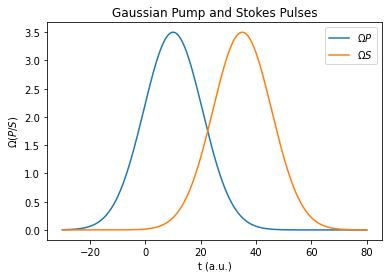

In [7]:
t = np.linspace(tmin,tmax,ntime)    # time vector

#Construction of omega_P and omega_S with respect to time
#Choosing to send pump pulse first and stock pulse second
omega_P = np.zeros(len(t))  # Rabi frequency of the Pump pulse
omega_S = np.zeros(len(t))  # Rabi frequency of the Stokes pulse
for n in range(ntime):
    omega_P[n] = OMEGA(omega0, t[n], t_P, tau_SP)
    omega_S[n] = OMEGA(omega0, t[n], t_S, tau_SP)

#Hamiltonian matrix
H = Hamiltonian(ntime, omega0, t, omega_P, omega_S, tau_SP, delta_P, delta_S)

# plot the guassian pulses
plt.figure()
plt.plot(t,omega_P) 
plt.plot(t,omega_S)
plt.title('Gaussian Pump and Stokes Pulses')
plt.xlabel('t (a.u.)')
plt.ylabel('$\Omega (P/S)$')
plt.legend(('$\Omega P$','$\Omega S$'))
plt.show()

This graph is a schematic of timing for S and P Rabi-frequency-pulses of STIRAP that shows the time ordering of the P and S pulses. The pump pulse is sent in first at the time $10 a.u$. and then the Stokes pulse is sent in $35 a.u.$. The pulses are shown as having equal widths and heights with a peak value $\Omega_0 = 3.5 a.u.$. This is the intuitive ordering.

### Question 2
**At the initial time tmin = −30 a.u., the atom is in the state |1>, intuitively in what state should the atom be at the final time tmax = 80 a.u. (when the two pulses are turned off)?**

As it's defined before, the "Pump" pulse is quasi-resonant with the transition $\left| 1 \right> \rightarrow \left| 2 \right>$ and the "Stokes" pulse is quasi-resonant with the transition $\left| 2\right>\rightarrow\left| 3 \right>$. <br> The atom at the beginning (t = -30a.u.) is in the state $\left| 1 \right>$. When the Pump pulse is applyed first (at t = 10a.u.), the atom must be subjected to the transition to state $\left| 2 \right>$.
At t = 35 a.u. the stokes pulse is sent, the atom is already in the state $\left| 2 \right>$ after the first pulse, so now this second one must subject the atom to the transition to state $\left| 3 \right>$ which is supposed to be the final state at t = 80a.u. when the two pulses are turned off.

### Question 3
**a. Integrate the Schrödinger equation by using the Richardson and the split operator methods.**

The _Richardson_ integrator is implemented using the following function

In [8]:
def Richardson_Integrator(T, H, DELTA_T, OMEGA0, T_MIN, T_P, T_S, TAU_SP, DELTA_P, DELTA_S, NTIME):
    EPS = 0.1                                       # tolerable error concerning the norm conservation
    PSI_R = np.zeros((3,len(T)),dtype = complex)    # initialising a vector of psi values, each a column vector of 3 elements
    PSI_R[:,0] = [1,0,0]                            # a column vector
    H_tmin = H[:,:,0]                               # find H at t = -30, initial time
    # calculating psi half for richardson integrator
    psihalf = PSI_R[:,0] - (1j*np.dot(H_tmin, PSI_R[:,0])*DELTA_T)
    # finding the Hamiltoninan at tmin+delta_t/2
    omega_P_half = OMEGA(OMEGA0, T_MIN+DELTA_T/2, T_P, TAU_SP)
    omega_S_half = OMEGA(OMEGA0, T_MIN+DELTA_T/2, T_S, TAU_SP)
    H_half = np.array([[0,1/2*omega_P_half,0],[1/2*omega_P_half,DELTA_P,1/2*omega_S_half],[0,1/2*omega_S_half,DELTA_P-DELTA_S]])
    PSI_R[:,1] = PSI_R[:,0] - (1j*np.dot(H_half,psihalf)*DELTA_T)
    # looping to get all values of psi 
    for i in range(1,NTIME-1):
        PSI_R[:,i+1] = PSI_R[:,i-1] - (2*1j * np.dot(H[:,:,i], PSI_R[:,i])*DELTA_T)
        if np.sqrt(np.dot(np.conj(PSI_R[:,i+1]), PSI_R[:,i+1])) > 1+EPS :
            print('divergence')
            break;
    return PSI_R

psi_r = Richardson_Integrator(t, H, Deltat, omega0, tmin, t_P, t_S, tau_SP, delta_P, delta_S, ntime)
print(psi_r)

[[ 1.00000000e+00+0.00000000e+00j  9.99999838e-01+0.00000000e+00j
   9.99999643e-01+4.67590436e-08j ...  8.81295696e-03-1.78729421e-02j
   8.81235795e-03-1.78733675e-02j  8.81295695e-03-1.78729425e-02j]
 [ 0.00000000e+00+0.00000000e+00j -5.39954450e-05-4.12334913e-04j
  -1.13392101e-04-8.51132374e-04j ...  9.98798755e-01+1.01397010e-01j
   1.00325215e+00-3.69039249e-02j  9.88647064e-01-1.74501082e-01j]
 [ 0.00000000e+00+0.00000000e+00j -1.43154726e-12+0.00000000e+00j
  -3.25534021e-12+1.21363928e-12j ...  3.36498968e-02-1.47336144e-02j
   2.82901965e-02-2.34640828e-02j  2.07397584e-02-3.04262391e-02j]]


The _split operator_ integrator is implemented in the following function

In [9]:
def Split_Integrator(T, H, NTIME, DELTA_T):
    PSI_S = np.zeros((3,len(T)),dtype = complex)    #a vector of psi values, each a column vector of 3 elements
    PSI_S[:,0] = [1,0,0]                            # psi is a column vector [0,0,1]'

    for i in range(NTIME-1):
        PSI_S[:,i+1] = np.dot(LA2.expm(-1j*H[:,:,i]*DELTA_T),PSI_S[:,i])
    return PSI_S
psi_s = Split_Integrator(t, H, ntime, Deltat)
print(psi_s)

[[ 1.00000000e+00+0.00000000e+00j  9.99999923e-01+3.53060995e-09j
   9.99999661e-01+3.10922110e-08j ... -3.62653656e-03-1.72911442e-02j
  -3.62653671e-03-1.72911443e-02j -3.62653687e-03-1.72911445e-02j]
 [ 0.00000000e+00+0.00000000e+00j -2.69552131e-05-3.91457909e-04j
  -1.10078044e-04-8.15696027e-04j ...  7.89654953e-01-6.13264225e-01j
   6.98143523e-01-7.15712290e-01j  5.93453438e-01-8.04650125e-01j]
 [ 0.00000000e+00+0.00000000e+00j -6.53893630e-13+9.04813152e-14j
  -2.93950251e-12+8.01870712e-13j ...  6.31722061e-03-6.34186439e-05j
   6.00632968e-03-1.82428756e-03j  5.22938835e-03-3.42229702e-03j]]


**b. Draw on a single figure the time-dependent populations t→<1|ψ(t)>^2, t→<2|ψ(t)>^2 and t→<3|ψ(t)>^2.**

<ipython-input-10-3a0dda4acbff>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  normalised_product_r1[i] = np.dot(product_r1[i],np.conj(product_r1[i]))  # normalising the dot product by multiplying with the conjugate
<ipython-input-10-3a0dda4acbff>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  normalised_product_r2[i] = np.dot(product_r2[i],np.conj(product_r2[i]))  # normalising the dot product by multiplying with the conjugate
<ipython-input-10-3a0dda4acbff>:26: ComplexWarning: Casting complex values to real discards the imaginary part
  normalised_product_r3[i] = np.dot(product_r3[i],np.conj(product_r3[i]))  #normalising the dot product by multiplying with the conjugate


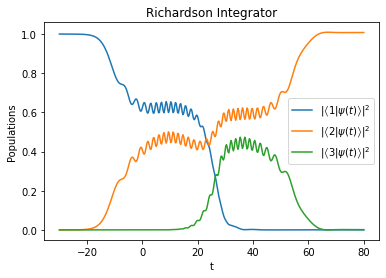

In [10]:
#Time dependent population plotted using psi generated using the richardson operator
# initialising the three states of the atom
state_1 = [1,0,0] 
state_2 = [0,1,0]
state_3 = [0,0,1]

# initialising vectors for the probabilities for the atom to be in states 1,2,3 with psi generated using richardson integrator.
product_r1 = np.zeros(len(t),dtype = complex)
normalised_product_r1 = np.zeros(len(t))

product_r2 = np.zeros(len(t),dtype = complex)
normalised_product_r2 = np.zeros(len(t))

product_r3 = np.zeros(len(t),dtype = complex)
normalised_product_r3 = np.zeros(len(t))

for i in range(ntime):
    # to find the probability to find the atom in state 1
    product_r1[i] = np.dot(state_1,psi_r[:,i])  # innerproduct of state 1 with psi 
    normalised_product_r1[i] = np.dot(product_r1[i],np.conj(product_r1[i]))  # normalising the dot product by multiplying with the conjugate 
    # to find the probability to find the atom in state 2
    product_r2[i] = np.dot(state_2,psi_r[:,i])   # innerproduct of state 2 with psi
    normalised_product_r2[i] = np.dot(product_r2[i],np.conj(product_r2[i]))  # normalising the dot product by multiplying with the conjugate 
    # to find the probability to find the atom in state 2
    product_r3[i] = np.dot(state_3,psi_r[:,i])  # innerproduct of state 3 with psi
    normalised_product_r3[i] = np.dot(product_r3[i],np.conj(product_r3[i]))  #normalising the dot product by multiplying with the conjugate 

# plotting the time-dependent populations for states calculated using richardson integrator
plt.plot(t,normalised_product_r1)
plt.plot(t,normalised_product_r2)
plt.plot(t,normalised_product_r3)
plt.title('Richardson Integrator')
plt.xlabel('t')
plt.ylabel('Populations')
plt.legend((r'$\left|\left<1|\psi(t)\right>\right|^2$',r'$\left|\left<2|\psi(t)\right>\right|^2$',r'$\left|\left<3|\psi(t)\right>\right|^2$','y'))
plt.show()

plt.figure

warnings.filterwarnings('ignore')

Starting from the state $\left| 1 \right>$ at t = -30a.u., the probability to be in this state is 1. Going till t = 10 the system is in a superposition of the two states $\left| 1 \right>$ and $\left| 2 \right>$ which corresponds to the Pump pulse only and this a reasonable result according to the definition of this pulse. <br>
From t = 10a.u. to t = 40 a.u., there's a combination between the two pulses where the pump pulse is decreasing (and that's why probability of state $\left| 1 \right>$ is going to be zero) while the stokes pulse is increasing which leads to the increasing of the population of state $\left| 3 \right>$. <br>
For an incomprehensible reason, after t = 40a.u., when the Pump pulse is turned off completely and there's only the stokes pulse, the atom goes from state  $\left| 3 \right>$ to state  $\left| 2 \right>$ completely to obtain a probability equal to 1 for the sate  $\left| 3 \right>$ at t = 80a.u.


Next, we plot the same graphs using the split operator integrator.

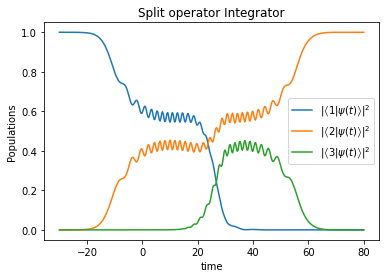

In [11]:
# using psi generated using split operator
#Finding the probabilities for the atom to be in states 1,2,3 with psi generated using split integrator. 
product_s1 = np.zeros(len(t),dtype = complex)
normalised_product_s1 = np.zeros(len(t))

product_s2 = np.zeros(len(t),dtype = complex)
normalised_product_s2 = np.zeros(len(t))

product_s3 = np.zeros(len(t),dtype = complex)
normalised_product_s3 = np.zeros(len(t))

for i in range(ntime):
    # to find the probability to find the atom in state 1
    product_s1[i] = np.dot(state_1,psi_s[:,i])  # innerproduct of state 1 with psi 
    normalised_product_s1[i] = np.dot(product_s1[i],np.conj(product_s1[i]))  #normalising the dot product by multiplying with the conjugate
    
    # to find the probability to find the atom in state 2
    product_s2[i] = np.dot(state_2,psi_s[:,i])  # innerproduct of state 2 with psi 
    normalised_product_s2[i] = np.dot(product_s2[i],np.conj(product_s2[i]))  #normalising the dot product by multiplying with the conjugate
    
    # to find the probability to find the atom in state 3
    product_s3[i] = np.dot(state_3,psi_s[:,i])  # innerproduct of state 1 with psi  
    normalised_product_s3[i] = np.dot(product_s3[i],np.conj(product_s3[i]))  ##normalising the dot product by multiplying with the conjugate

# plotting the time-dependent populations for states calculated using the split operator integrator    
plt.figure()
plt.plot(t,normalised_product_s1)
plt.plot(t,normalised_product_s2)
plt.plot(t,normalised_product_s3)
plt.title('Split operator Integrator')
plt.xlabel('time')
plt.ylabel('Populations')
plt.legend((r'$\left|\left<1|\psi(t)\right>\right|^2$',r'$\left|\left<2|\psi(t)\right>\right|^2$',r'$\left|\left<3|\psi(t)\right>\right|^2$','y'))
plt.show()

warnings.filterwarnings('ignore')

**c. Compare the two integration methods with respect to the time step ∆t (or equivalently with respect to N (ntime)). Comment.**

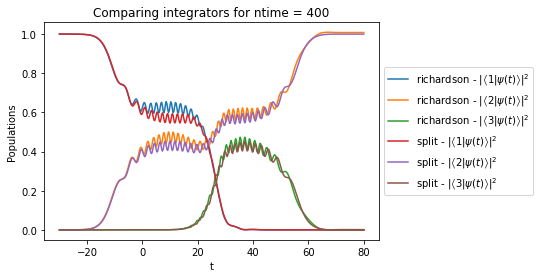

In [12]:
# Comparing the richardson and the split operator integrator for two different time steps 
plt.figure()
plt.plot(t,normalised_product_r1, label = r'richardson - $\left|\left<1|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_r2, label = r'richardson - $\left|\left<2|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_r3, label = r'richardson - $\left|\left<3|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_s1, label = r'split - $\left|\left<1|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_s2, label = r'split - $\left|\left<2|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_s3, label = r'split - $\left|\left<3|\psi(t)\right>\right|^2$')
plt.title('Comparing integrators for ntime = {}'.format(ntime))
plt.xlabel('t')
plt.ylabel('Populations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Comparing the two integrators methods. it can be seen clearly that the result is the same with a very small errors at some region which is negligible errors.

### Question 4
**After the numerical solving of the Schrödinger equation, in what state is the atom?**

After the numerical solving of the Schrödinger equation, it can be seen that the atom is in the state $\left|2\right>$. As shown on the graph, the probability of finding the system in the state $\left|2\right>$ becomes one after the numerical integration, whereas, the other two probabilities go to zero. Thus, the second state is now populated. <br>
That means that our expectation in question two is not correct, and there's another effects included corresponding to a quantum point of view which can't be seen in the population representation in order to understand why there's a reverse transition in the stokes pulse.

### Question 5
**Integrate anew the Schrödinger equation but by sending first the Stokes pulse before the pump pulse. What is the result? Comment.**

Here, we do exactly the same as before with one difference. We change the values of the $t_S$ and $t_P$. In this way we first send the Stockes pulse and then the pump pulse. 

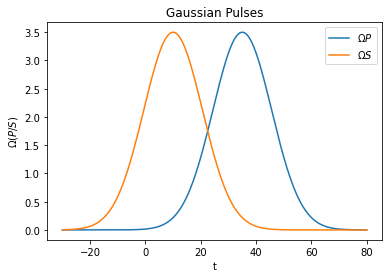

In [14]:
omega_P = np.zeros(len(t))  # Rabi frequency of the Pump pulse
omega_S = np.zeros(len(t))  # Rabi frequency of the Stokes pulse
for n in range(ntime):
    omega_P[n] = OMEGA(omega0, t[n], t_S, tau_SP)
    omega_S[n] = OMEGA(omega0, t[n], t_P, tau_SP)

#Hamiltonian matrix
H_SP = Hamiltonian(ntime, omega0, t, omega_P, omega_S, tau_SP, delta_P, delta_S)

# plot the guassian pulses
plt.figure()
plt.plot(t,omega_P) 
plt.plot(t,omega_S)
plt.title('Gaussian Pulses')
plt.xlabel('t')
plt.ylabel('$\Omega (P/S)$')
plt.legend(('$\Omega P$','$\Omega S$'))
plt.show()

Here, the Guassian pulse of the Stokes laser appears first at time 10 a.u. instead of the pump pulse. This is the counteractive ordering.

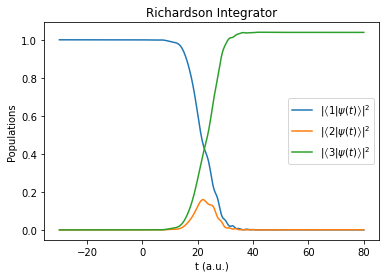

In [15]:
#Time-dependent population plotted using psi generated using the richardson operator
psi_r = Richardson_Integrator(t, H_SP, Deltat, omega0, tmin, t_S, t_P, tau_SP, delta_P, delta_S, ntime)

# initialising the three states of the atom
state_1 = [1,0,0] 
state_2 = [0,1,0]
state_3 = [0,0,1]

# initialising vectors for the probabilities for the atom to be in states 1,2,3 with psi generated using richardson integrator.
product_r1 = np.zeros(len(t),dtype = complex)
normalised_product_r1 = np.zeros(len(t))

product_r2 = np.zeros(len(t),dtype = complex)
normalised_product_r2 = np.zeros(len(t))

product_r3 = np.zeros(len(t),dtype = complex)
normalised_product_r3 = np.zeros(len(t))

for i in range(ntime):
    # to find the probability to find the atom in state 1
    product_r1[i] = np.dot(state_1,psi_r[:,i])  # innerproduct of state 1 with psi 
    normalised_product_r1[i] = np.dot(product_r1[i],np.conj(product_r1[i]))  # normalising the dot product by multiplying with the conjugate 
    # to find the probability to find the atom in state 2
    product_r2[i] = np.dot(state_2,psi_r[:,i])   # innerproduct of state 2 with psi
    normalised_product_r2[i] = np.dot(product_r2[i],np.conj(product_r2[i]))  # normalising the dot product by multiplying with the conjugate 
    # to find the probability to find the atom in state 2
    product_r3[i] = np.dot(state_3,psi_r[:,i])  # innerproduct of state 3 with psi
    normalised_product_r3[i] = np.dot(product_r3[i],np.conj(product_r3[i]))  #normalising the dot product by multiplying with the conjugate 

# plotting the time-dependent populations for states calculated using richardson integrator
plt.plot(t,normalised_product_r1)
plt.plot(t,normalised_product_r2)
plt.plot(t,normalised_product_r3)
plt.title('Richardson Integrator')
plt.xlabel('t (a.u.)')
plt.ylabel('Populations')
plt.legend((r'$\left|\left<1|\psi(t)\right>\right|^2$',r'$\left|\left<2|\psi(t)\right>\right|^2$',r'$\left|\left<3|\psi(t)\right>\right|^2$','y'))
plt.show()

plt.figure

warnings.filterwarnings('ignore')

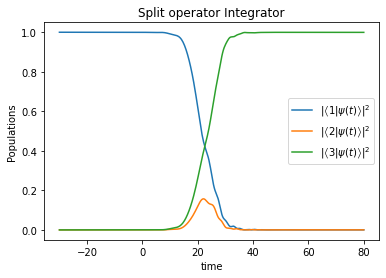

In [16]:
# using psi generated using split operator
psi_s = Split_Integrator(t, H_SP, ntime, Deltat)
#Finding the probabilities for the atom to be in states 1,2,3 with psi generated using split integrator. 
product_s1 = np.zeros(len(t),dtype = complex)
normalised_product_s1 = np.zeros(len(t))

product_s2 = np.zeros(len(t),dtype = complex)
normalised_product_s2 = np.zeros(len(t))

product_s3 = np.zeros(len(t),dtype = complex)
normalised_product_s3 = np.zeros(len(t))

for i in range(ntime):
    # to find the probability to find the atom in state 1
    product_s1[i] = np.dot(state_1,psi_s[:,i])  # innerproduct of state 1 with psi 
    normalised_product_s1[i] = np.dot(product_s1[i],np.conj(product_s1[i]))  #normalising the dot product by multiplying with the conjugate
    
    # to find the probability to find the atom in state 2
    product_s2[i] = np.dot(state_2,psi_s[:,i])  # innerproduct of state 2 with psi 
    normalised_product_s2[i] = np.dot(product_s2[i],np.conj(product_s2[i]))  #normalising the dot product by multiplying with the conjugate
    
    # to find the probability to find the atom in state 3
    product_s3[i] = np.dot(state_3,psi_s[:,i])  # innerproduct of state 1 with psi  
    normalised_product_s3[i] = np.dot(product_s3[i],np.conj(product_s3[i]))  ##normalising the dot product by multiplying with the conjugate

# plotting the time-dependent populations for states calculated using the split operator integrator    
plt.figure()
plt.plot(t,normalised_product_s1)
plt.plot(t,normalised_product_s2)
plt.plot(t,normalised_product_s3)
plt.title('Split operator Integrator')
plt.xlabel('time')
plt.ylabel('Populations')
plt.legend((r'$\left|\left<1|\psi(t)\right>\right|^2$',r'$\left|\left<2|\psi(t)\right>\right|^2$',r'$\left|\left<3|\psi(t)\right>\right|^2$','y'))
plt.show()

warnings.filterwarnings('ignore')

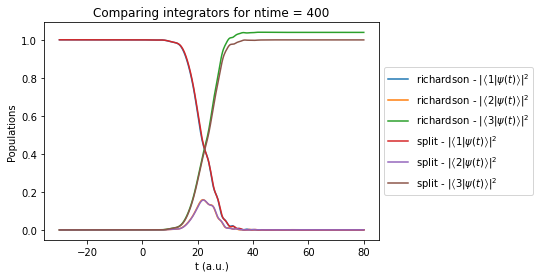

In [17]:
# Comparing the richardson and the split operator integrator for two different time steps 
plt.figure()
plt.plot(t,normalised_product_r1, label = r'richardson - $\left|\left<1|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_r2, label = r'richardson - $\left|\left<2|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_r3, label = r'richardson - $\left|\left<3|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_s1, label = r'split - $\left|\left<1|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_s2, label = r'split - $\left|\left<2|\psi(t)\right>\right|^2$')
plt.plot(t,normalised_product_s3, label = r'split - $\left|\left<3|\psi(t)\right>\right|^2$')
plt.title('Comparing integrators for ntime = {}'.format(ntime))
plt.xlabel('t (a.u.)')
plt.ylabel('Populations')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In the case of sending the Stokes pulse before the pump one, the numerical solving of the Schrödinger equation leads to the state $\left|3\right>$ as a final state after turning off of the two pulses. We observe that there's no effect of stokes pulse on the changing of states (Stokes correspond to the transition $\left|2\right> \rightarrow \left|3\right>$ but the initial state is $\left|1\right>$). <br>
In the interval of t = 10a.u. and t = 40a.u. there's a combinition between the two pulses where we see a supperposition of the three states until the atom goes to state $\left|3\right>$ completly when the pump pulse is only represented till tmax = 80a.u. with some doubts about the reason of such variation using this representation.


We have the same results as before with the Richardson method failing for larger step time $\Delta t$. The split operator is conditionally stable for larger values of $\Delta t$ but that does not ensures that the algorithm converges to a good solution at a large time step.

### Question 6
**Draw on a single figure the time-dependent eigenvalues of H(ΩP (t), ΩS(t)) (the eigenvalues must at each
time by ordered by increasing values) for the two cases (pump then Stokes and Stokes then pump).**

**Case 1:** Pump, then Stokes pulses

The eigen vectors are:
[[[ 9.99995922e-01 -2.85592248e-03  3.49708571e-11]
  [-2.85592248e-03 -9.99995922e-01  2.44897609e-08]
  [ 3.49701441e-11  2.44897609e-08  1.00000000e+00]]

 [[ 9.99995042e-01 -3.14897593e-03  4.52024047e-11]
  [-3.14897593e-03 -9.99995042e-01  2.87088459e-08]
  [ 4.52012841e-11  2.87088459e-08  1.00000000e+00]]

 [[ 9.99993980e-01 -3.46975350e-03  5.83485497e-11]
  [-3.46975350e-03 -9.99993980e-01  3.36320698e-08]
  [ 5.83467935e-11  3.36320698e-08  1.00000000e+00]]

 ...

 [[ 1.00000000e+00 -1.71597237e-09  4.61418625e-13]
  [-1.71597237e-09 -9.99999855e-01  5.37792759e-04]
  [ 4.61418959e-13  5.37792759e-04  9.99999855e-01]]

 [[ 1.00000000e+00 -1.44694336e-09  3.48806373e-13]
  [-1.44694336e-09 -9.99999884e-01  4.82128689e-04]
  [ 3.48806576e-13  4.82128689e-04  9.99999884e-01]]

 [[ 1.00000000e+00 -1.21926854e-09  2.63321837e-13]
  [-1.21926854e-09 -9.99999907e-01  4.31934193e-04]
  [ 2.63321960e-13  4.31934193e-04  9.99999907e-01]]]


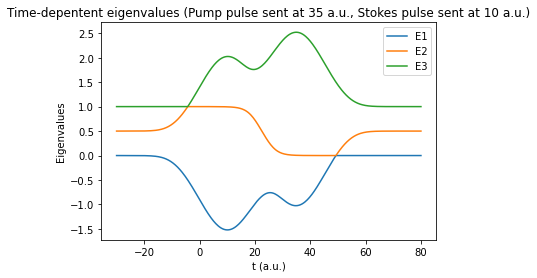

In [18]:
# initialising a vector for eigen values
eigenvalues = np.zeros((len(t),3))
eigenvectors = np.zeros(((len(t),3,3)))

# finding the time dependent eigen values of H
for i in range (ntime):
    eig = LA.eigh(H[:,:,i]) # eigh guarantees you that the eigenvalues are sorted and we use this since the Hamiltonian is symmetric
    eigenvalues[i] = eig[0]
    eigenvectors[i] = eig[1]
print('The eigen vectors are:')    
print(eigenvectors)    
# plotting the time-depentent eigenvalues of H
plt.figure()
plt.plot(t,eigenvalues[:,0], label = 'E1')
plt.plot(t,eigenvalues[:,1], label = 'E2')
plt.plot(t,eigenvalues[:,2], label = 'E3')
plt.title('Time-depentent eigenvalues (Pump pulse sent at {} a.u., Stokes pulse sent at {} a.u.)'.format(t_S,t_P) )
plt.xlabel('t (a.u.)')
plt.ylabel('Eigenvalues')
plt.legend()
plt.show()

In this representation, the eigenvalues functions must take the non diffractive way, it means that at the cross (e.g. for E1 at t = 50a.u. approximately), the function continues in the non diffractive way that leads to the final state $\left| 2 \right>$ which is consistent with the previous result (the population representation).

Case2: First Stokes, and then Pump pulses:

The eigen vectors are:
[[[ 1.00000000e+00 -2.44897609e-08  3.49701441e-11]
  [-2.44897609e-08 -9.99995922e-01  2.85592248e-03]
  [ 3.49708571e-11  2.85592248e-03  9.99995922e-01]]

 [[ 1.00000000e+00 -2.87088459e-08  4.52012841e-11]
  [-2.87088459e-08 -9.99995042e-01  3.14897593e-03]
  [ 4.52024047e-11  3.14897593e-03  9.99995042e-01]]

 [[ 1.00000000e+00 -3.36320698e-08  5.83467935e-11]
  [-3.36320698e-08 -9.99993980e-01  3.46975350e-03]
  [ 5.83485497e-11  3.46975350e-03  9.99993980e-01]]

 ...

 [[ 9.99999855e-01 -5.37792759e-04  4.61418959e-13]
  [-5.37792759e-04 -9.99999855e-01  1.71597237e-09]
  [ 4.61418625e-13  1.71597237e-09  1.00000000e+00]]

 [[ 9.99999884e-01 -4.82128689e-04  3.48806576e-13]
  [-4.82128689e-04 -9.99999884e-01  1.44694336e-09]
  [ 3.48806373e-13  1.44694336e-09  1.00000000e+00]]

 [[ 9.99999907e-01 -4.31934193e-04  2.63321960e-13]
  [-4.31934193e-04 -9.99999907e-01  1.21926854e-09]
  [ 2.63321837e-13  1.21926854e-09  1.00000000e+00]]]


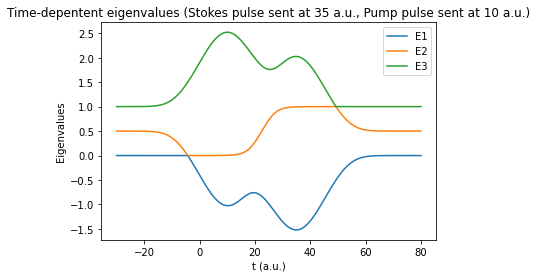

In [19]:
# initialising a vector for eigen values
eigenvalues = np.zeros((len(t),3))
eigenvectors = np.zeros(((len(t),3,3)))

# finding the time dependent eigen values of H
for i in range (ntime):
    eig = LA.eigh(H_SP[:,:,i]) # eigh guarantees you that the eigenvalues are sorted and we use this since the Hamiltonian is symmetric
    eigenvalues[i] = eig[0]
    eigenvectors[i] = eig[1]
print('The eigen vectors are:')    
print(eigenvectors)    
# plotting the time-depentent eigenvalues of H
plt.figure()
plt.plot(t, eigenvalues[:,0], label = 'E1')
plt.plot(t, eigenvalues[:,1], label = 'E2')
plt.plot(t, eigenvalues[:,2], label = 'E3')
plt.title('Time-depentent eigenvalues (Stokes pulse sent at {} a.u., Pump pulse sent at {} a.u.)'.format(t_S,t_P) )
plt.xlabel('t (a.u.)')
plt.ylabel('Eigenvalues')
plt.legend()
plt.show()

Here, there's two crosses if we look to the eigenvalues of the first state. In the first cross the function continues its way corresponding to the transition to the state $\left| 2 \right>$ at t = 0 a.u. The second cross (at t = 50a.u.) leads to the state $\left| 3 \right>$ which is the final state of the atom and consistent with the population respresentation but with more clarity.

### Question 7
**Knowing that we can show that the dynamics is adiabatic except at the times where the energy levels cross,
and that at these times the system state follows the more regular path, interpret the simulation outcomes.
The counter-intuitive quantum effect enlighten by these simulations is called STIRAP (STImulated Raman
Adiabatic Passage).**

The adiabatic states are given by the spontaneous eigenstates of the Hamiltonian and the adiabatic energies are given by the eigen values of the Hamiltonian. As the dynamics is adiabatic, there are no transitions between the adiabatic states except at the times when the energy levels cross. Maintaining the adiabatic evolution is a defining feature of the STIRAP process.

The **<u>intuitive pulse</u>** is when the pump pulse is send in first at 10 a.u. and the stokes pulse is send **<u>in second</u>**  at the time 35 a.u.. The counterintitive pulse is when the stokes pulse is send in first at 10 a.u. and the pump pulse send in second at the time 35 a.u..

We send the Stokes and Pump pulses to the system with a slight delay between the two and also by maintaining an overlap between the two pulses such that the delay provides the correct limiting behavior and the overlap ensures adiabatic evolution.

The two opposite pulse sequences, counterintuitive and intuitive, gives two different results. The counterintuitive sequence induces complete population transfer to state $\left|3\right>$ which is depicted on the graph for time-dependent eigenvalues with two crossings, the first one between E1 and E2, and the other between E2 and E3. However, for the intuitive pulse sequence, we obtain only a single eigenvalue crossing between E1 and E2, depicting the transition to the state $\left|2\right>$ .

If the lifetime of state $\left|2\right>$ is short compared to the excitation duration then population transfer can be acheived only with the counterintuitive sequence. However, if the lifetime of the state $\left|2\right>$ is sufficiently long the complete population to state $\left|3\right>$ can be obtained using either ordering of the pulses.

## CONCLUSION

A quantum dynamical system is represented by the Schrodinger equation which can be solved numerically using two integrators: the Richardson integrator and the Split operator integrator.<br> Comparing these integrators, we find that Richardson integrator fails for large time steps and it is conditionally stable whereas the Split operator integrator is unconditionally stable. <br> 
This practical work also explores the STIRAP process that involves the adiabatic evolution of states. Population transfers using other methods might not be efficient but the STIRAP method provides highly efficient population transfer from state $\left|1\right>$ to state $\left|3\right>$. This is a powerful tool that can be exploited in many **<u>areas of science</u>**. 